# Supermarket sales

**Reading dataset**

In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading the csv data to a Pandas DataFrame
path = "supermarket_sales - Sheet1.csv"
df = pd.read_csv(path)


In [3]:
#statistical information about the dataset
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


**Data Preprocessing**

In [4]:
# getting some information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [5]:
# inspecting the first 5 rows of the dataframe
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [6]:
# inspecting the last 5 rows of the dataframe
df.tail()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1
999,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7,30.9190,649.2990,2/18/2019,13:28,Cash,618.38,4.761905,30.9190,6.6


In [7]:
# checking the number of rows and columns
df.shape

(1000, 17)

In [8]:
df.nunique()

Invoice ID                 1000
Branch                        3
City                          3
Customer type                 2
Gender                        2
Product line                  6
Unit price                  943
Quantity                     10
Tax 5%                      990
Total                       990
Date                         89
Time                        506
Payment                       3
cogs                        990
gross margin percentage       1
gross income                990
Rating                       61
dtype: int64

In [9]:
df['date'] = pd.to_datetime(df['Date'])

In [10]:
df['date'].dtype

dtype('<M8[ns]')

In [11]:
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,date
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,2019-01-05
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,2019-03-08
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,2019-03-03
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,2019-01-27
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,2019-02-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2,2019-01-29
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4,2019-03-02
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7,2019-02-09
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1,2019-02-22


In [12]:
df['day'] = (df['date']).dt.day
df['month'] = (df['date']).dt.month
df['year'] = (df['date']).dt.year

In [13]:
df['Time'] = pd.to_datetime(df['Time'])

In [14]:
df['Hour'] = (df['Time']).dt.hour

In [15]:
df.groupby(['Quantity']).agg({'Total': 'count'})

,Total
Quantity,
1,112
2,91
3,90
4,109
5,102
6,98
7,102
8,85
9,92


In [16]:
df.groupby(['Product line']).agg({'Total': 'count'})

,Total
Product line,
Electronic accessories,170
Fashion accessories,178
Food and beverages,174
Health and beauty,152
Home and lifestyle,160
Sports and travel,166


In [17]:
df.groupby(['Customer type']).agg({'Total': 'count'})

,Total
Customer type,
Member,501
Normal,499


In [18]:
df.groupby(['Gender']).agg({'Total': 'count'})

,Total
Gender,
Female,501
Male,499


In [19]:
df.groupby(['Branch']).agg({'Total': 'count'})

,Total
Branch,
A,340
B,332
C,328


In [20]:
df.groupby(['Payment']).agg({'Total': 'count'})

,Total
Payment,
Cash,344
Credit card,311
Ewallet,345


In [21]:
df.groupby(['Payment', 'Branch']).agg({'Total': 'count'})

Total
Payment     Branch       
Cash        A         110
            B         110
            C         124
Credit card A         104
            B         109
            C          98
Ewallet     A         126
            B         113
            C         106

In [22]:
df.groupby(['Product line', 'Gender']).agg({'Total': 'count'})

Total
Product line           Gender       
Electronic accessories Female     84
                       Male       86
Fashion accessories    Female     96
                       Male       82
Food and beverages     Female     90
                       Male       84
Health and beauty      Female     64
                       Male       88
Home and lifestyle     Female     79
                       Male       81
Sports and travel      Female     88
                       Male       78

In [23]:
df.groupby(['Product line', 'Branch']).agg({'Total': 'count'})

Total
Product line           Branch       
Electronic accessories A          60
                       B          55
                       C          55
Fashion accessories    A          51
                       B          62
                       C          65
Food and beverages     A          58
                       B          50
                       C          66
Health and beauty      A          47
                       B          53
                       C          52
Home and lifestyle     A          65
                       B          50
                       C          45
Sports and travel      A          59
                       B          62
                       C          45

In [24]:
df.groupby(['Customer type', 'Branch']).agg({'Total': 'count'})

Total
Customer type Branch       
Member        A         167
              B         165
              C         169
Normal        A         173
              B         167
              C         159

In [25]:
df.groupby(['Branch', 'Quantity']).agg({'Total': 'count'})

Total
Branch Quantity       
A      1            36
       2            28
       3            34
       4            37
       5            44
       6            31
       7            36
       8            25
       9            31
       10           38
B      1            32
       2            33
       3            36
       4            39
       5            28
       6            36
       7            28
       8            30
       9            34
       10           36
C      1            44
       2            30
       3            20
       4            33
       5            30
       6            31
       7            38
       8            30
       9            27
       10           45

In [26]:
df.groupby(['Branch', 'Gender']).agg({'Total': 'count'})

Total
Branch Gender       
A      Female    161
       Male      179
B      Female    162
       Male      170
C      Female    178
       Male      150

In [27]:
df.groupby(['Customer type', 'Gender']).agg({'Total': 'count'})

Total
Customer type Gender       
Member        Female    261
              Male      240
Normal        Female    240
              Male      259

In [28]:
df.groupby(['Branch', 'Customer type', 'Gender']).agg({'Total': 'count'})

Total
Branch Customer type Gender       
A      Member        Female     80
                     Male       87
       Normal        Female     81
                     Male       92
B      Member        Female     85
                     Male       80
       Normal        Female     77
                     Male       90
C      Member        Female     96
                     Male       73
       Normal        Female     82
                     Male       77

In [29]:
df.groupby(['Branch']).agg({"Unit price": [np.mean, np.sum, np.min, np.max]})

Unit price                        
             mean       sum   amin   amax
Branch                                   
A       54.780853  18625.49  10.08  99.83
B       55.659277  18478.88  10.59  99.96
C       56.609024  18567.76  10.16  99.96

**Visualising**

**Plotting every relationship**

<AxesSubplot:>

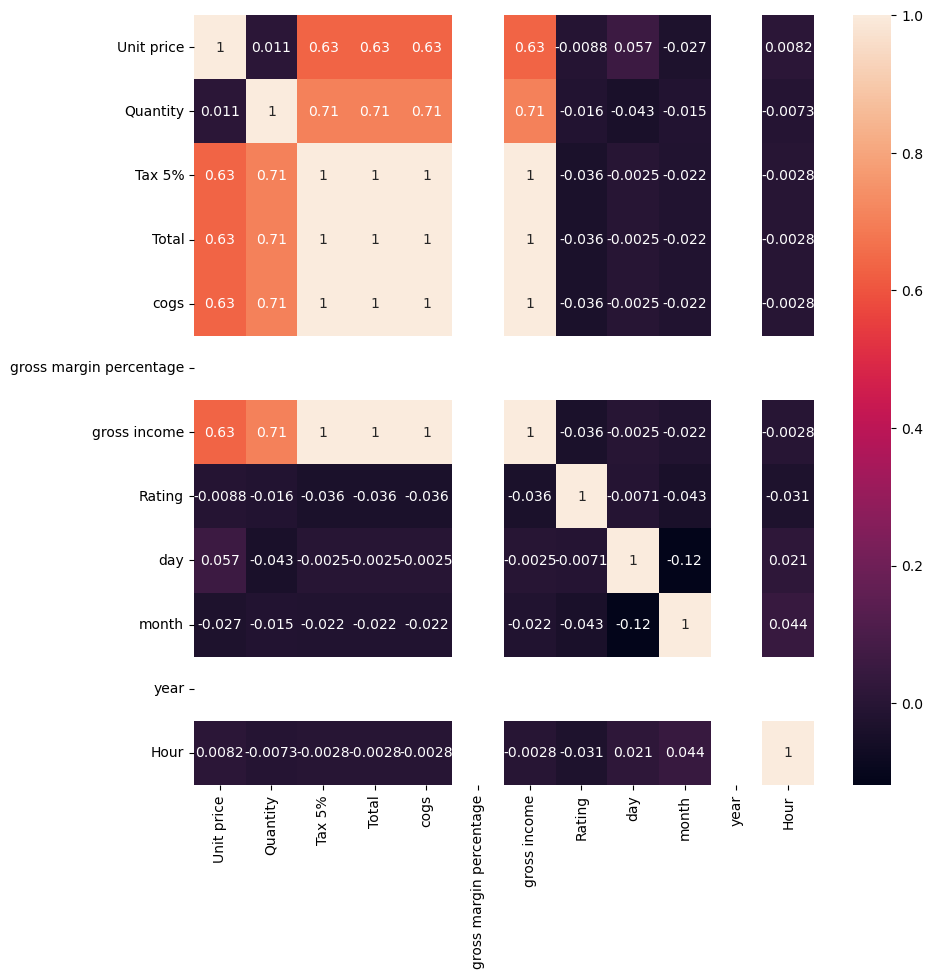

In [30]:
plt.figure(figsize = (10,10))

sns.heatmap(df.corr(), annot =True)

**Branches of the supermarket**

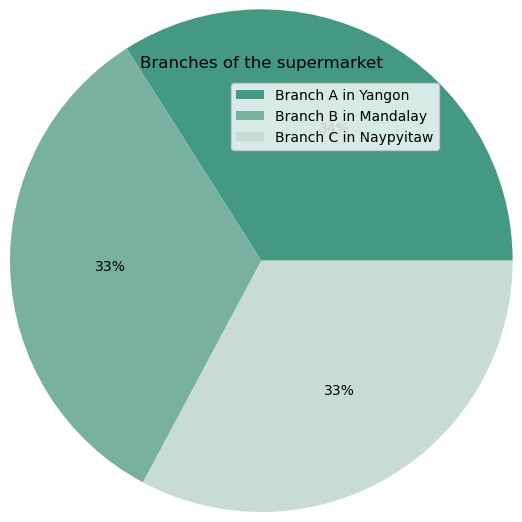

In [31]:
branch=[340, 332, 328]
plt.pie(branch,  radius=1.7, colors=["#439981","#78b19f", "#c8dbd5"], 
        rotatelabels=False, autopct= "%1.0f%%")
plt.title('Branches of the supermarket')
plt.legend(labels=["Branch A in Yangon", "Branch B in Mandalay", "Branch C in Naypyitaw"])

**Female VS Male**

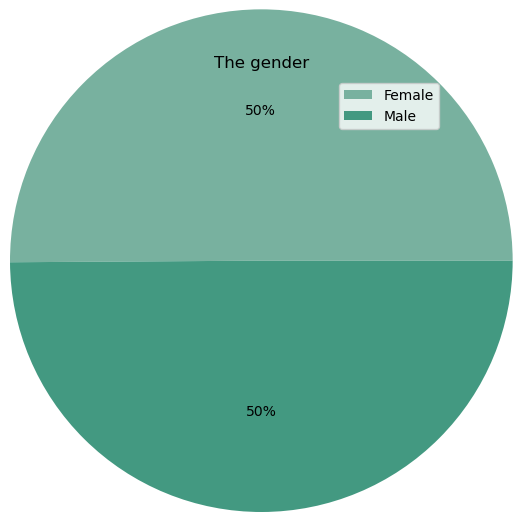

In [32]:
branch=[501, 499]
plt.pie(branch,  radius=1.7, colors=["#78b19f", "#439981"], 
        rotatelabels=False, autopct= "%1.0f%%")
plt.title('The gender')
plt.legend(labels=["Female", "Male"])

Ratio of females and males in each branch

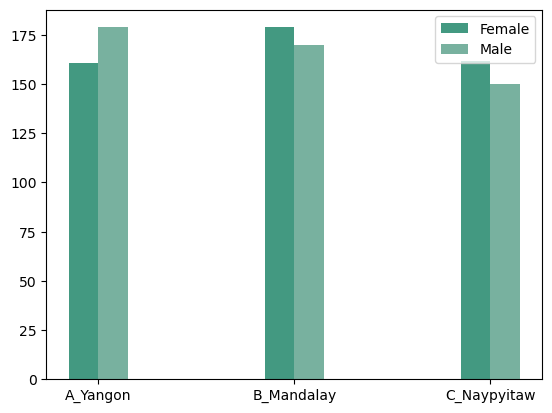

In [33]:
female = (161, 179, 162)
male = (179, 170, 150)
X = np.arange(3) 
width = 0.15 
plt.bar(X, female, width, label='Female', color="#439981")
plt.bar(X + width, male, width, label='Male', color="#78b19f")
plt.xticks(X + width / 2, ("A_Yangon", "B_Mandalay", "C_Naypyitaw"))
plt.legend(loc='best')

Female interests VS Male interest


([<matplotlib.axis.XTick at 0x1b6d4524eb0>,
 [Text(0.0375, 0, 'Female'), Text(1.0375, 0, 'Male')])

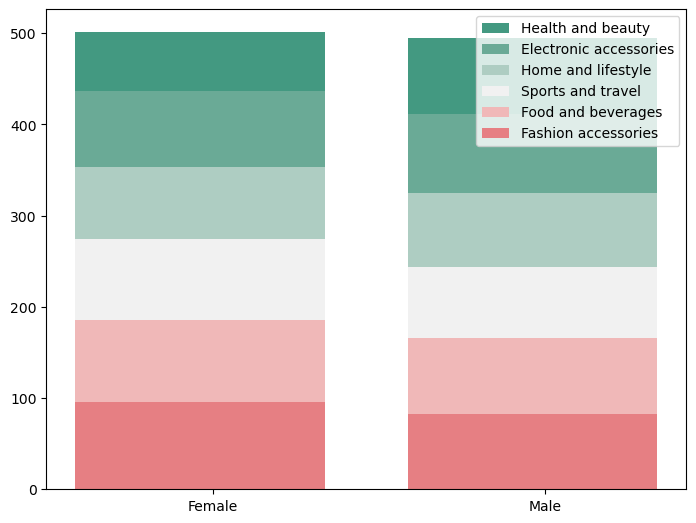

In [34]:
health_and_beauty = np.array([64, 84])
electronic_accessories = np.array([84, 86])
home_and_lifestyle = np.array([79, 81])
sports_and_travel = np.array([88, 78])
food_and_beverages = np.array([90, 84])
fashion_accessories = np.array([96, 82])
X = np.arange(2) 
fig = plt.figure()
width = 0.75
ax = fig.add_axes([0,0,1,1])
ax.bar(X, health_and_beauty, width, bottom=fashion_accessories+food_and_beverages+sports_and_travel+home_and_lifestyle+electronic_accessories, color="#439981")
ax.bar(X, electronic_accessories, width, bottom=fashion_accessories+food_and_beverages+sports_and_travel+home_and_lifestyle, color="#6aaa96")
ax.bar(X, home_and_lifestyle, width, bottom=fashion_accessories+food_and_beverages+sports_and_travel, color="#aecdc2")
ax.bar(X, sports_and_travel, width, bottom=fashion_accessories+food_and_beverages, color="#f1f1f1")
ax.bar(X, food_and_beverages, width, bottom=fashion_accessories, color="#f0b8b8")
ax.bar(X, fashion_accessories, width, color="#e67f83")
ax.legend(labels=["Health and beauty", "Electronic accessories", "Home and lifestyle", "Sports and travel", 
                           "Food and beverages", "Fashion accessories"])
plt.xticks(X + width / 20, ("Female", "Male"))

**Products Line**

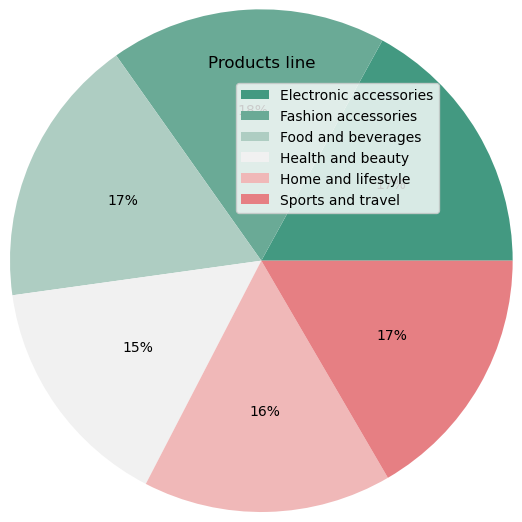

In [35]:
branch=[170, 178, 174, 152, 160, 166]
plt.pie(branch,  radius=1.7, colors=["#439981","#6aaa96", "#aecdc2", "#f1f1f1", "#f0b8b8", "#e67f83"], 
        rotatelabels=False, autopct= "%1.0f%%")
plt.title('Products line')
plt.legend(labels=["Electronic accessories", "Fashion accessories", "Food and beverages", "Health and beauty", "Home and lifestyle", "Sports and travel"])

Quantity sold from each production line

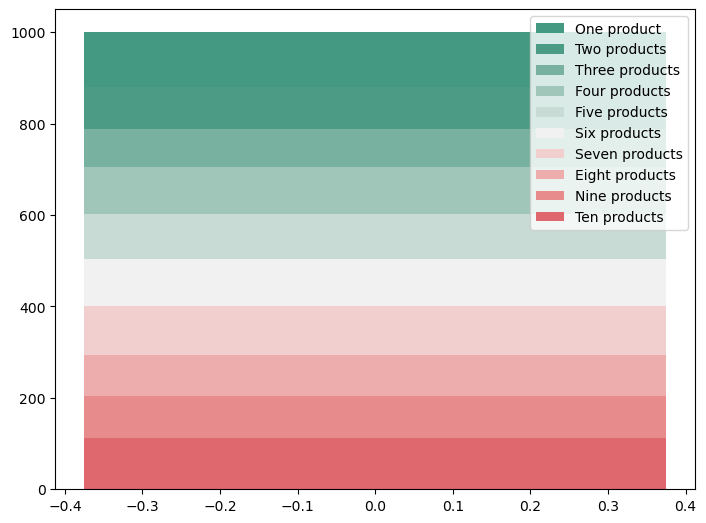

In [36]:
ten_products = (119)
nine_products = (92)
eight_products = (85)
seven_products = (102)
six_products = (98)
five_products = (102)
four_products = (109)
three_products = (90)
two_products = (91)
one_products = (112)

X = np.arange(1) 
fig = plt.figure()
width = 0.75
ax = fig.add_axes([0,0,1,1])
ax.bar(X, ten_products, width, bottom=one_products+two_products+three_products+four_products+five_products+six_products+seven_products+eight_products+nine_products, color="#439981")
ax.bar(X, nine_products, width, bottom=one_products+two_products+three_products+four_products+five_products+six_products+seven_products+eight_products, color="#4c9c85")
ax.bar(X, eight_products, width, bottom=one_products+two_products+three_products+four_products+five_products+six_products+seven_products, color="#78b19f")
ax.bar(X, seven_products, width, bottom=one_products+two_products+three_products+four_products+five_products+six_products, color="#a0c6b9")
ax.bar(X, six_products, width, bottom=one_products+two_products+three_products+four_products+five_products, color="#c8dbd5")
ax.bar(X, five_products, width,bottom=one_products+two_products+three_products+four_products ,color="#f1f1f1")
ax.bar(X, four_products, width,bottom=one_products+two_products+three_products, color="#f1cfce")
ax.bar(X, three_products, width, bottom=one_products+two_products, color="#eeadad")
ax.bar(X, two_products, width, bottom=one_products ,color="#e88b8d")
ax.bar(X, one_products, width, color="#df676e") 
ax.legend(labels = ["One product", "Two products", "Three products", "Four products", "Five products", "Six products", "Seven products", "Eight products", "Nine products", "Ten products"])

Quantity sold from each production line in each branch

([<matplotlib.axis.XTick at 0x1b6d51f7700>,
 [Text(0.0375, 0, 'Branch A in Yangon'),
  Text(1.0375, 0, 'Branch B in Mandalay'),
  Text(2.0375, 0, 'Branch C in Naypyitaw')])

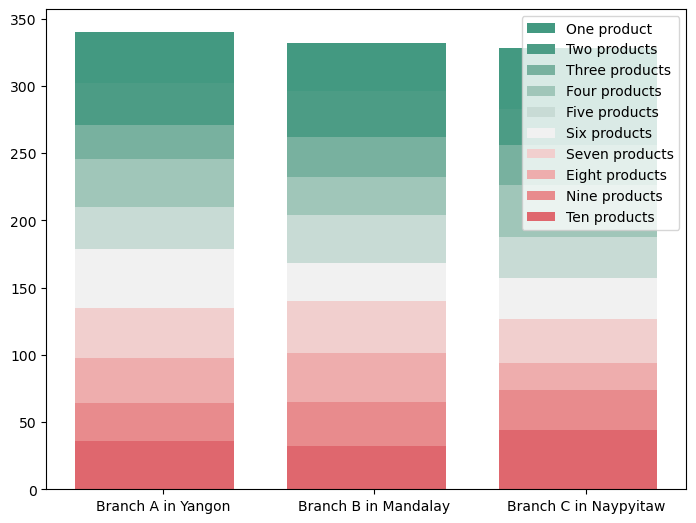

In [37]:
ten_products = np.array([38, 36, 45])
nine_products = np.array([31, 34, 27])
eight_products = np.array([25, 30, 30])
seven_products = np.array([36, 28, 38])
six_products = np.array([31, 36, 31])
five_products = np.array([44, 28, 30])
four_products = np.array([37, 39, 33])
three_products = np.array([34, 36, 20])
two_products = np.array([28, 33, 30])
one_products = np.array([36, 32, 44])

X = np.arange(3) 
fig = plt.figure()
width = 0.75
ax = fig.add_axes([0,0,1,1])
ax.bar(X, ten_products, width, bottom=one_products+two_products+three_products+four_products+five_products+six_products+seven_products+eight_products+nine_products, color="#439981")
ax.bar(X, nine_products, width, bottom=one_products+two_products+three_products+four_products+five_products+six_products+seven_products+eight_products, color="#4c9c85")
ax.bar(X, eight_products, width, bottom=one_products+two_products+three_products+four_products+five_products+six_products+seven_products, color="#78b19f")
ax.bar(X, seven_products, width, bottom=one_products+two_products+three_products+four_products+five_products+six_products, color="#a0c6b9")
ax.bar(X, six_products, width, bottom=one_products+two_products+three_products+four_products+five_products, color="#c8dbd5")
ax.bar(X, five_products, width,bottom=one_products+two_products+three_products+four_products ,color="#f1f1f1")
ax.bar(X, four_products, width,bottom=one_products+two_products+three_products, color="#f1cfce")
ax.bar(X, three_products, width, bottom=one_products+two_products, color="#eeadad")
ax.bar(X, two_products, width, bottom=one_products ,color="#e88b8d")
ax.bar(X, one_products, width, color="#df676e") 
ax.legend(labels = ["One product", "Two products", "Three products", "Four products", "Five products", "Six products", "Seven products", "Eight products", "Nine products", "Ten products"])
plt.xticks(X + width / 20, ("Branch A in Yangon", "Branch B in Mandalay", "Branch C in Naypyitaw"))

The most requested production line in each branch

([<matplotlib.axis.XTick at 0x1b6d4d2b070>,
 [Text(0.0375, 0, 'Branch A in Yangon'),
  Text(1.0375, 0, 'Branch B in Mandalay'),
  Text(2.0375, 0, 'Branch C in Naypyitaw')])

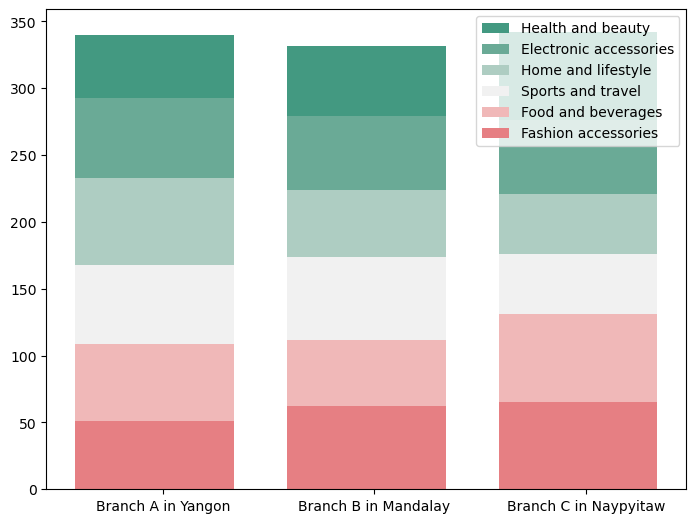

In [38]:
health_and_beauty = np.array([47, 53, 66])
electronic_accessories = np.array([60, 55, 55])
home_and_lifestyle = np.array([65, 50, 45])
sports_and_travel = np.array([59, 62, 45])
food_and_beverages = np.array([58, 50, 66])
fashion_accessories = np.array([51, 62, 65])
X = np.arange(3) 
fig = plt.figure()
width = 0.75
ax = fig.add_axes([0,0,1,1])
ax.bar(X, health_and_beauty, width, bottom=fashion_accessories+food_and_beverages+sports_and_travel+home_and_lifestyle+electronic_accessories, color="#439981")
ax.bar(X, electronic_accessories, width, bottom=fashion_accessories+food_and_beverages+sports_and_travel+home_and_lifestyle, color="#6aaa96")
ax.bar(X, home_and_lifestyle, width, bottom=fashion_accessories+food_and_beverages+sports_and_travel, color="#aecdc2")
ax.bar(X, sports_and_travel, width, bottom=fashion_accessories+food_and_beverages, color="#f1f1f1")
ax.bar(X, food_and_beverages, width, bottom=fashion_accessories, color="#f0b8b8")
ax.bar(X, fashion_accessories, width, color="#e67f83")
ax.legend(labels=["Health and beauty", "Electronic accessories", "Home and lifestyle", "Sports and travel", 
                           "Food and beverages", "Fashion accessories"])
plt.xticks(X + width / 20, ("Branch A in Yangon", "Branch B in Mandalay", "Branch C in Naypyitaw"))

**Customer type**

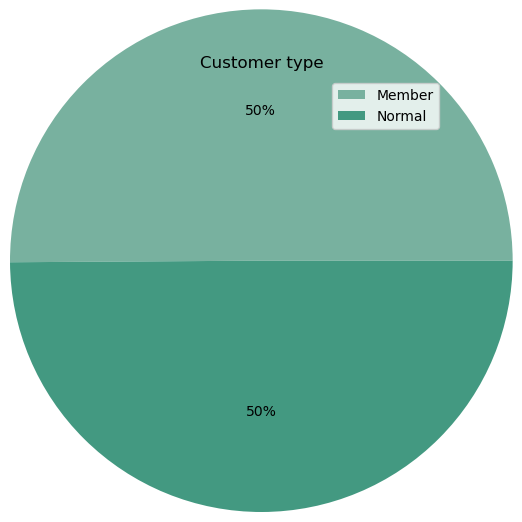

In [39]:
branch=[501, 499]
plt.pie(branch,  radius=1.7, colors=["#78b19f", "#439981"], 
        rotatelabels=False, autopct= "%1.0f%%")
plt.title('Customer type')
plt.legend(labels=["Member", "Normal"])

Customer type in each branch

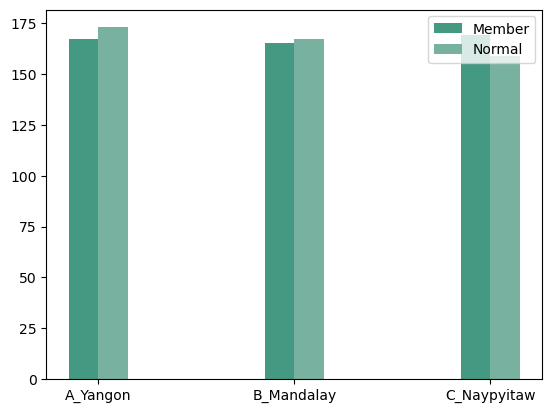

In [40]:
member = (167, 165, 169)
normal = (173, 167, 159)
X = np.arange(3) 
width = 0.15 
plt.bar(X, member, width, label='Member', color="#439981")
plt.bar(X + width, normal, width, label='Normal', color="#78b19f")
plt.xticks(X + width / 2, ("A_Yangon", "B_Mandalay", "C_Naypyitaw"))
plt.legend(loc='best')

Customer Type VS Gender in all branches

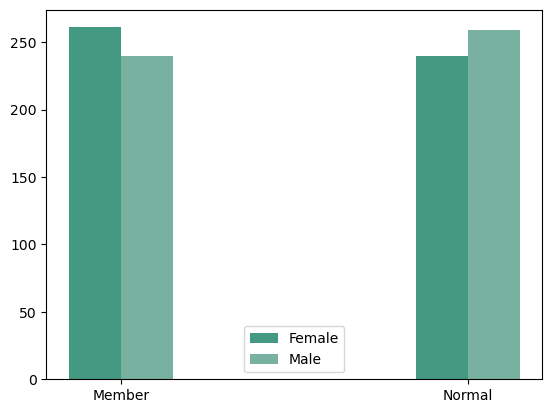

In [41]:
female = (261, 240)
male = (240, 259)
X = np.arange(2) 
width = 0.15 
plt.bar(X, female, width, label='Female', color="#439981")
plt.bar(X + width, male, width, label='Male', color="#78b19f")
plt.xticks(X + width / 2, ("Member", "Normal"))
plt.legend(loc='best')

-Branch A in Yangon city

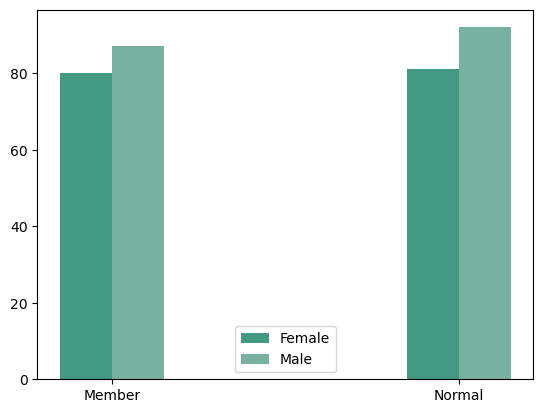

In [46]:
female = (80, 81)
male = (87, 92)
X = np.arange(2) 
width = 0.15 
plt.bar(X, female, width, label='Female', color="#439981")
plt.bar(X + width, male, width, label='Male', color="#78b19f")
plt.xticks(X + width / 2, ("Member", "Normal"))
plt.legend(loc='best')

-Branch B in Mandalay city

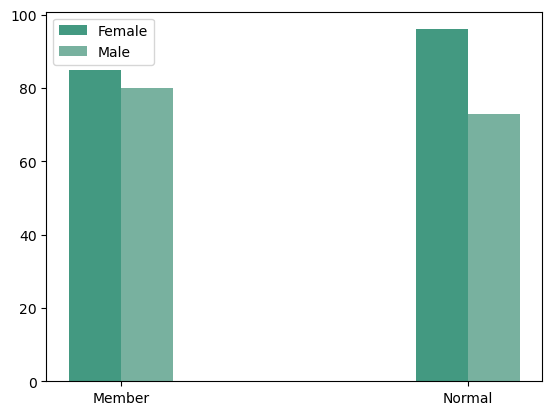

In [47]:
female = (85, 96)
male = (80, 73)
X = np.arange(2) 
width = 0.15 
plt.bar(X, female, width, label='Female', color="#439981")
plt.bar(X + width, male, width, label='Male', color="#78b19f")
plt.xticks(X + width / 2, ("Member", "Normal"))
plt.legend(loc='best')

-Branch C in Naypyitaw city

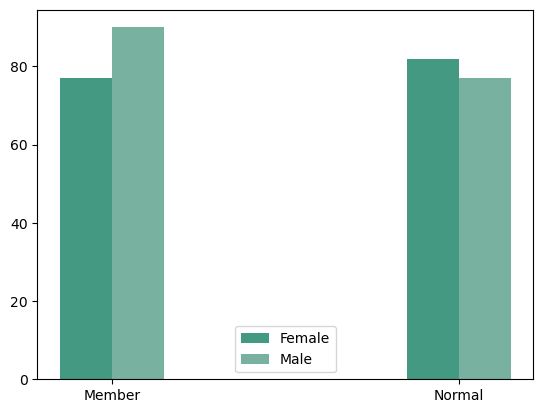

In [48]:
female = (77, 82)
male = (90, 77)
X = np.arange(2) 
width = 0.15 
plt.bar(X, female, width, label='Female', color="#439981")
plt.bar(X + width, male, width, label='Male', color="#78b19f")
plt.xticks(X + width / 2, ("Member", "Normal"))
plt.legend(loc='best')

**Payment methods**

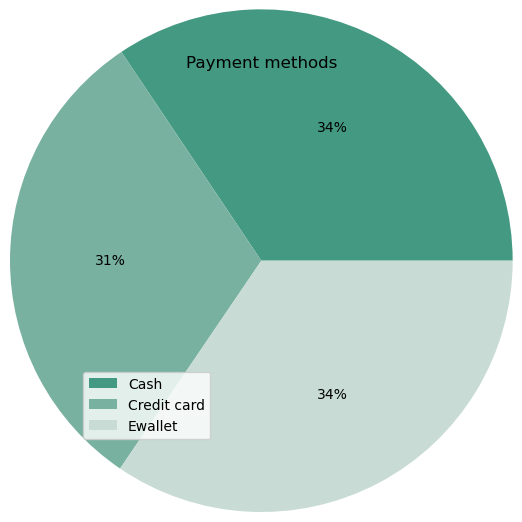

In [49]:
branch=[344, 311, 345]
plt.pie(branch,  radius=1.7, colors=["#439981","#78b19f", "#c8dbd5"], 
        rotatelabels=False, autopct= "%1.0f%%")
plt.title('Payment methods')
plt.legend(labels=["Cash", "Credit card", "Ewallet"], loc = 3)

Payment methods in each branch

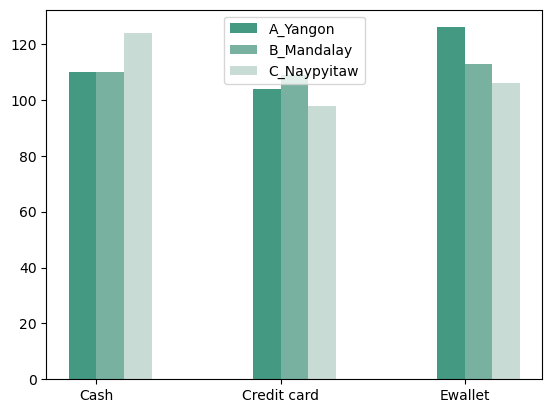

In [50]:
cash = (110, 104, 126)
credit_card = (110, 109, 113)
ewallet = (124, 98, 106)
X = np.arange(3) 
width = 0.15 
plt.bar(X, cash, width, label='A_Yangon', color="#439981")
plt.bar(X + width, credit_card, width, label='B_Mandalay', color="#78b19f")
plt.bar(X + 2*width, ewallet, width, label='C_Naypyitaw', color="#c8dbd5")
plt.xticks(X + width / 2, ("Cash", "Credit card", "Ewallet"))
plt.legend(loc='best')

Distribution of Gross Income

E:\Programs\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gross income'>

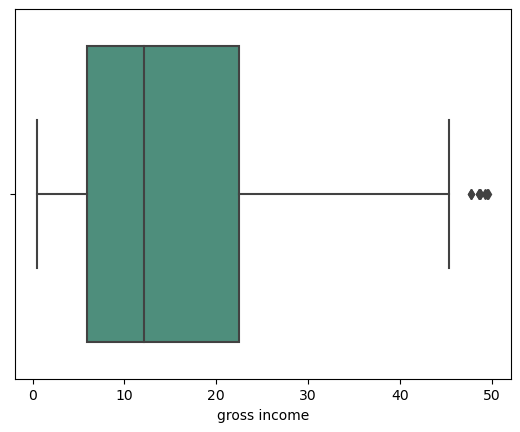

In [51]:
sns.boxplot(df['gross income'], color="#439981")

Distribution of Unit price

E:\Programs\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Unit price'>

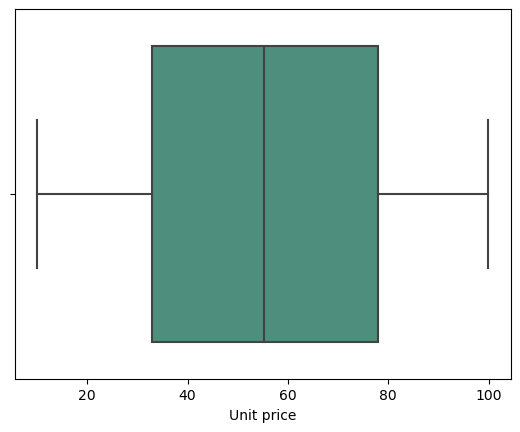

In [52]:
sns.boxplot(df['Unit price'], color="#439981")

Distribution of Rating

E:\Programs\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rating'>

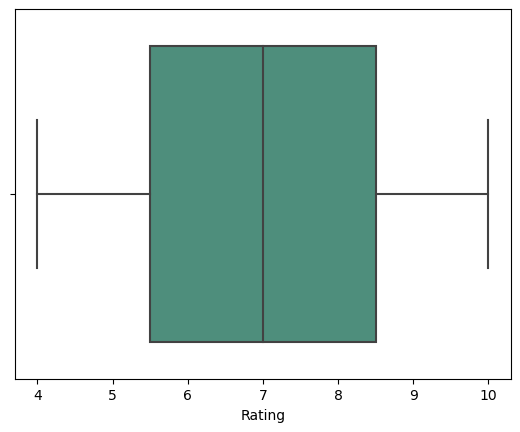

In [53]:
sns.boxplot(df['Rating'], color="#439981")

**Rating VS Cost of goods sold**

<AxesSubplot:xlabel='Rating', ylabel='cogs'>

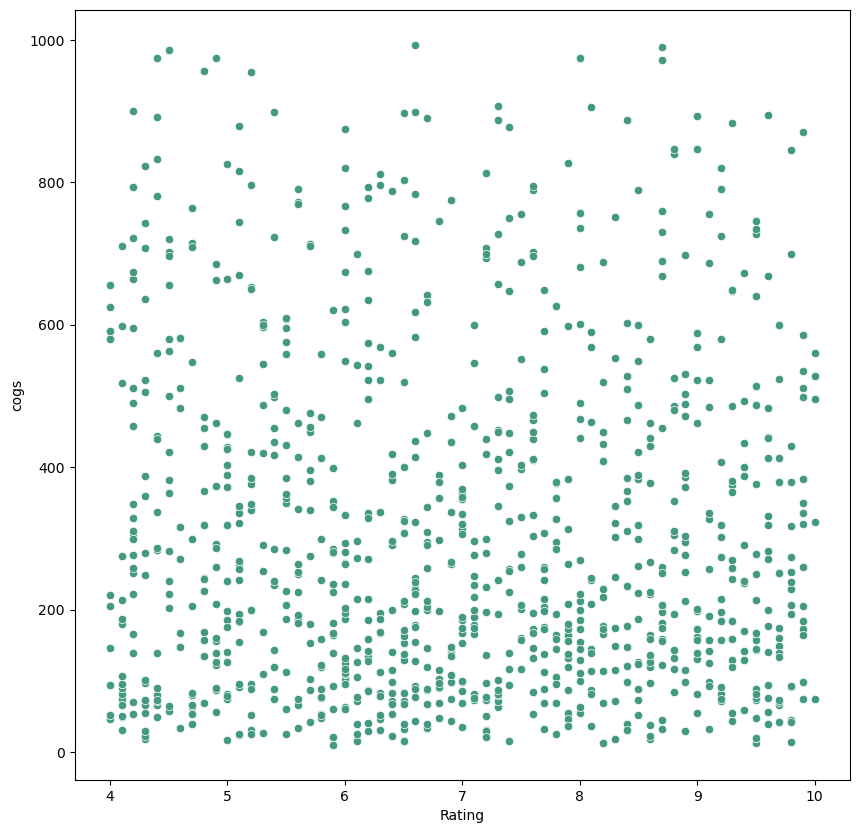

In [54]:
plt.figure(figsize = (10,10))
sns.scatterplot(x ='Rating' , y = 'cogs' , color="#439981" ,data=df )

**Rating VS gross income**

<AxesSubplot:xlabel='Rating', ylabel='gross income'>

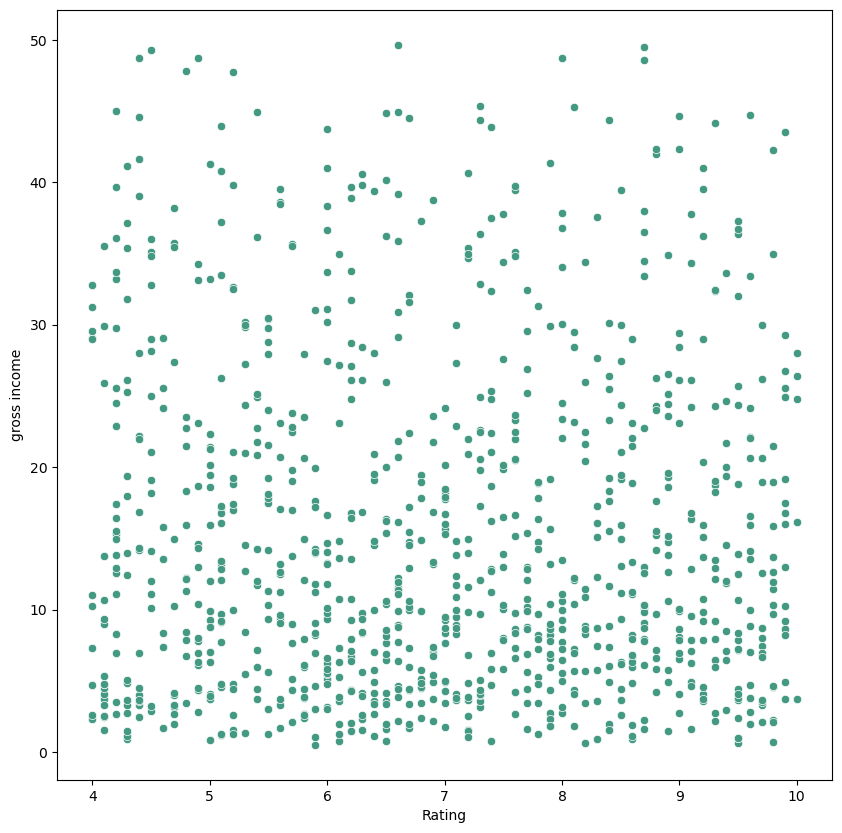

In [55]:
plt.figure(figsize = (10,10))
sns.scatterplot(x ='Rating' , y = 'gross income' , color="#439981" ,data=df )

Average of Unit price in each branch

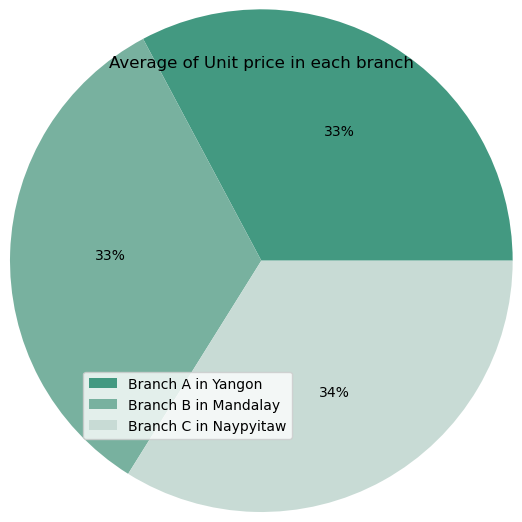

In [61]:
branches=[54.780853, 55.659277, 56.609024]
plt.pie(branches,  radius=1.7, colors=["#439981","#78b19f", "#c8dbd5"], 
        rotatelabels=False, autopct= "%1.0f%%")
plt.title('Average of Unit price in each branch')
plt.legend(labels=["Branch A in Yangon", "Branch B in Mandalay", "Branch C in Naypyitaw"], loc = 3)

**Product Sales per Hour**

<AxesSubplot:xlabel='Hour', ylabel='Quantity'>

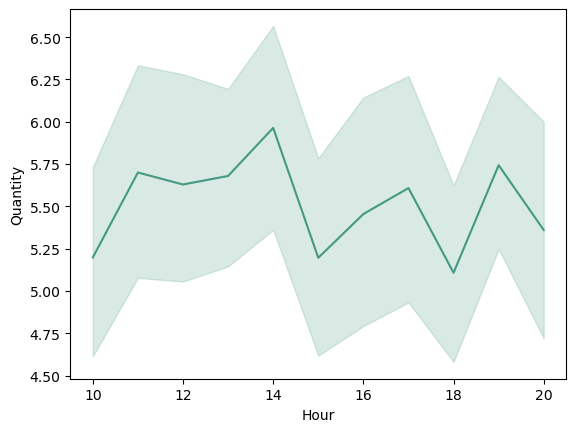

In [62]:
sns.lineplot(x="Hour",  y = 'Quantity',color="#439981", data =df)

**Branch's sales quantity looks like by the hour in a monthly fashion**

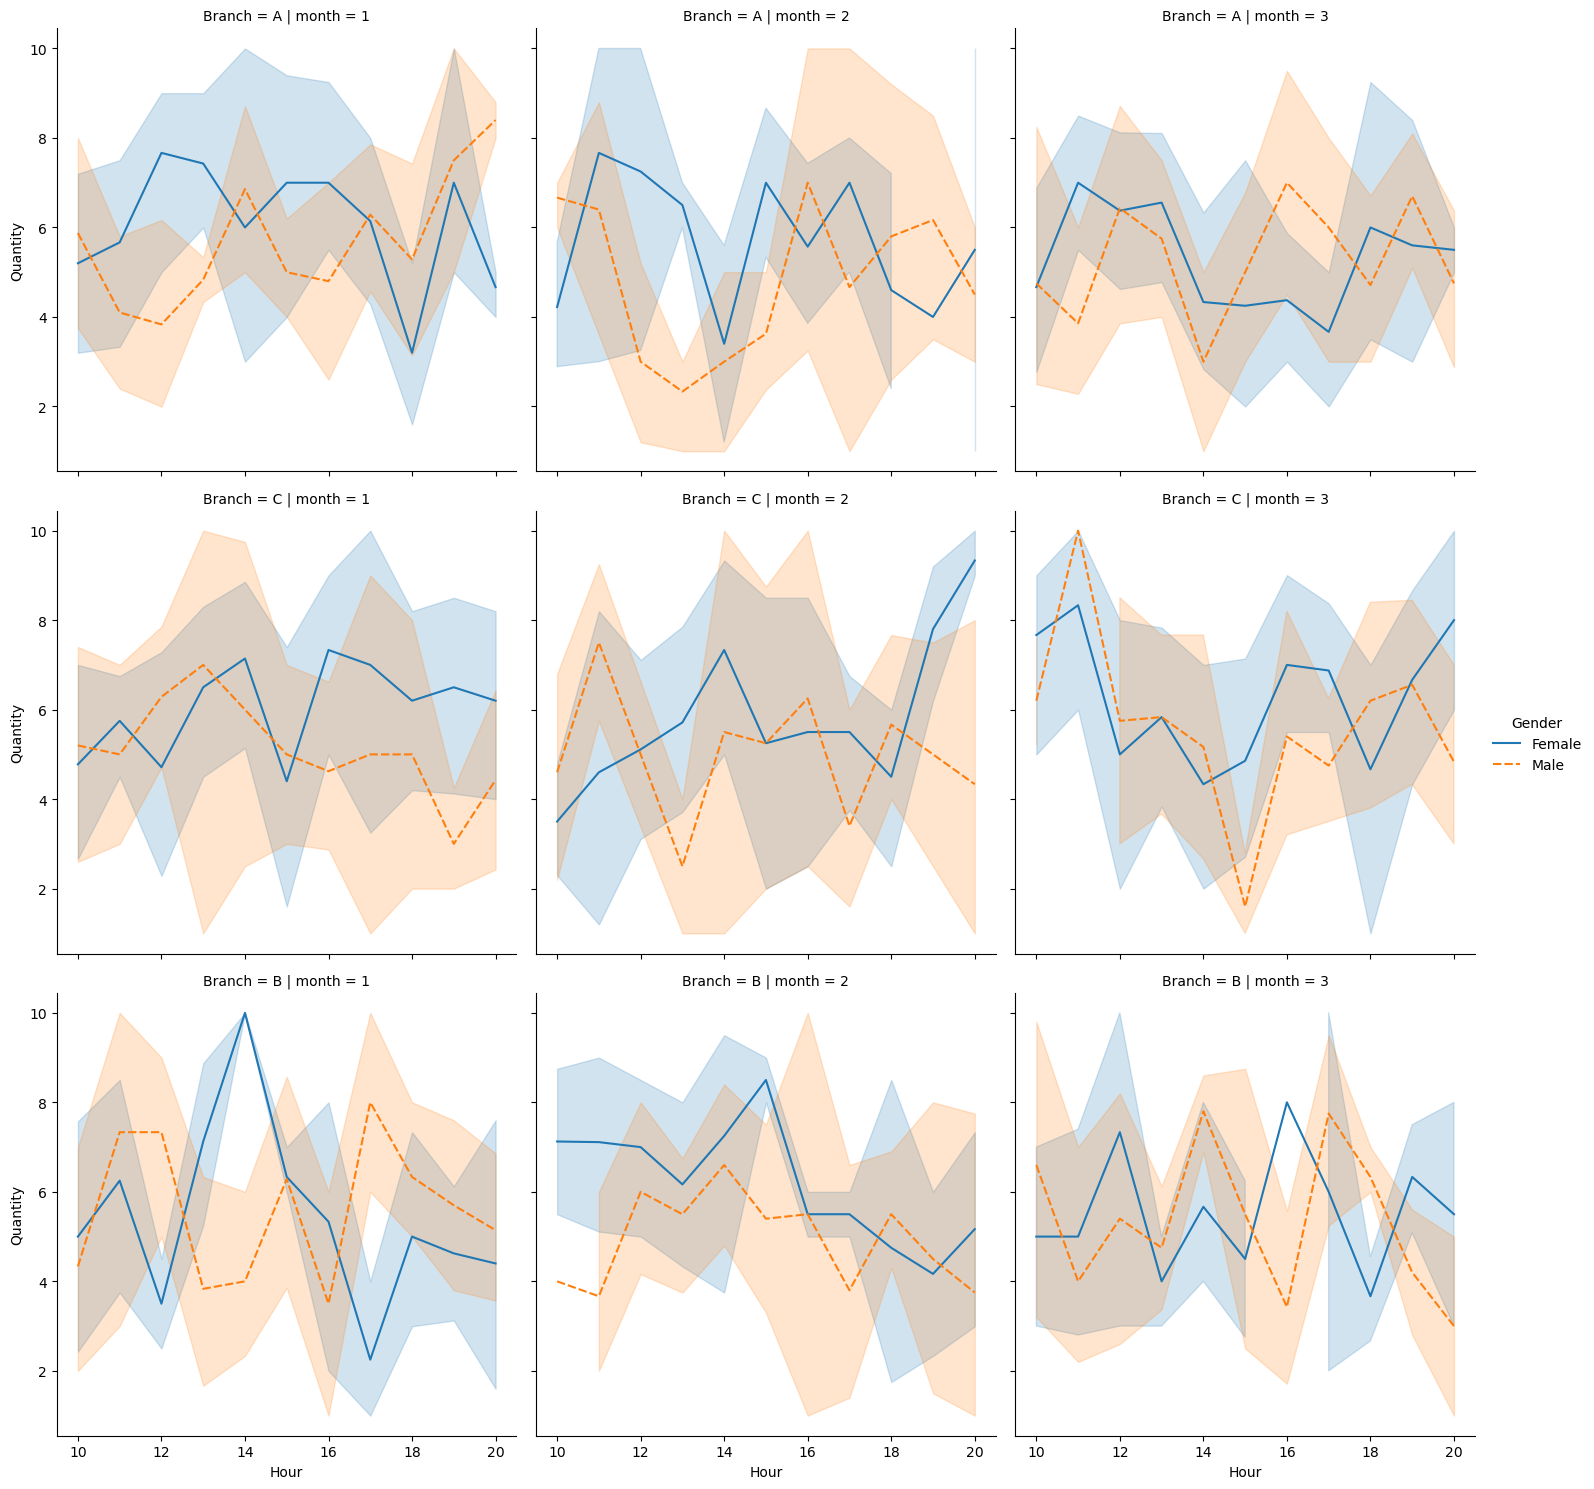

In [54]:
sns.relplot(x="Hour",  y = 'Quantity', col= 'month' , row= 'Branch', kind="line", hue="Gender", style="Gender", data =df)